In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import  DecisionTreeClassifier, plot_tree

In [26]:
Cen_Income = pd.read_csv('/content/sample_data/BANA Project Data(CW)- Census Income.csv')

In [27]:
Cen_Income.shape

(32561, 15)

There are 15 columns and 32561 rows in the dataframe Cen_Income.

In [28]:
Cen_Income.head(10)

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [29]:
Cen_Income.dtypes

Age                int64
Work_Class        object
fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
NativeCountry     object
Income            object
dtype: object

In [30]:
Cen_Income.describe()




,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
Cen_Income = Cen_Income.drop(columns = ['fnlwgt','Education_Num','NativeCountry'])

In [32]:
Cen_Income.shape

(32561, 12)

Three columns are deleted from the dataframe which means we have 12 columns remaining.

In [33]:
# Checking for missing value in each columns of the dataframe Cen_Income.
Cen_Income.isna().sum()

Age               0
Work_Class        0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Income            0
dtype: int64

<Axes: xlabel='Hours_Per_Week'>

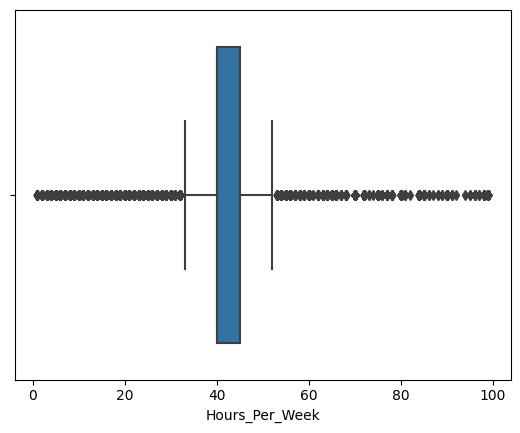

In [34]:
sns.boxplot(x=Cen_Income['Hours_Per_Week'])

In [35]:

q1 = Cen_Income['Hours_Per_Week'].quantile(0.25)
q3 = Cen_Income['Hours_Per_Week'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr



40.0
45.0


In [36]:
print(lower_fence)
print(upper_fence)

32.5
52.5


In [37]:
Cen_Income =Cen_Income[(Cen_Income['Hours_Per_Week']>=lower_fence)&(Cen_Income['Hours_Per_Week']<=upper_fence)]

<Axes: xlabel='Hours_Per_Week'>

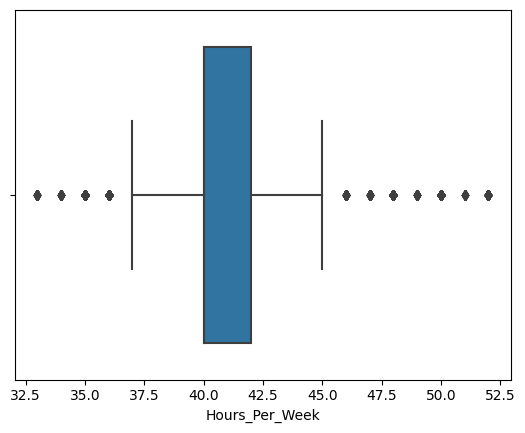

In [38]:
sns.boxplot(x=Cen_Income['Hours_Per_Week'])



<Axes: xlabel='Age'>

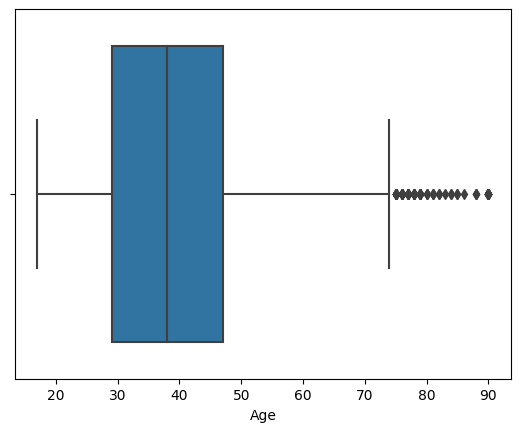

In [39]:
sns.boxplot(data=Cen_Income, x='Age')

In [40]:
q1 = Cen_Income['Age'].quantile(0.25)
q3 = Cen_Income['Age'].quantile(0.75)
iqr = q3 - q1

print(q1)
print(q3)

threshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
Cen_Income =Cen_Income[(Cen_Income['Age']>lower_fence)&(Cen_Income['Age']<upper_fence)]

29.0
47.0


<Axes: xlabel='Age'>

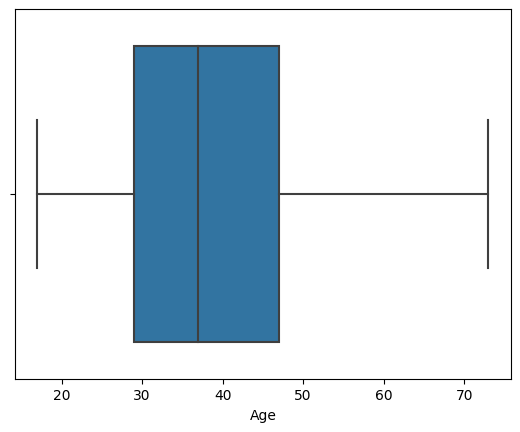

In [41]:
sns.boxplot(data=Cen_Income, x='Age')

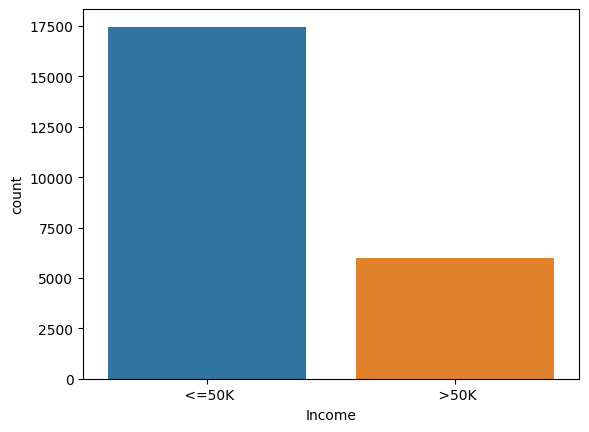

In [42]:
#Visualizing the distribution of outcome
sns.countplot(x='Income',data= Cen_Income)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

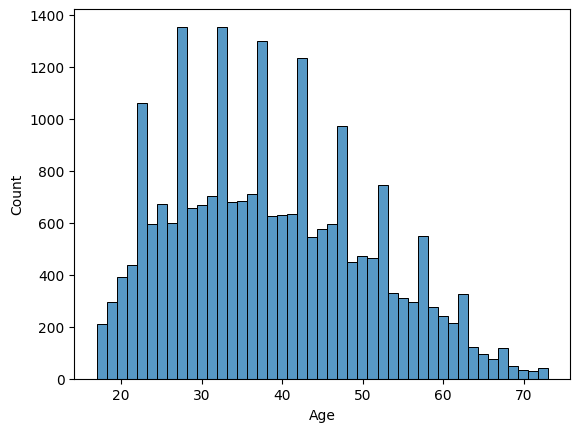

In [43]:
# creating histogram
sns.histplot(x=Cen_Income['Age'])

In [45]:
#---------------------------------------------------------# Creating first model by Logistic regression--------------------------------------------------------------------------------------------

CenIncome_mod1 = Cen_Income[['Age','Hours_Per_Week','Income']]                    #Creates dataframe with selected variables for first model
X1 = CenIncome_mod1.drop('Income',axis=1)

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)   #fit_transform computes mean and standard deviation used for later scaling and applies transformation / It is often applied to transform the training data and simultaneously fit the transformation parameters (if any) based on that data

Y = Cen_Income['Income']                #defining tagret variable

X1_train, X1_test, Y_train, Y_test = train_test_split(X1_scaled, Y, test_size=0.3, random_state=42)  #split the feature and target variable into training and testing sets.

logreg_mod1 = LogisticRegression()     #initializing the logistic regression

logreg_mod1.fit(X1_train, Y_train)       # fit the model to the training data

LogisticRegression()

In [46]:
Coef_CenIncome = pd.DataFrame({'Features': X1.columns, 'Coefficinet': logreg_mod1.coef_[0]})       #calculates the cofficient from the logreg_mod1, and a dataframe Coef_CenIncome is created.
print(Coef_CenIncome)

         Features  Coefficinet
0             Age     0.606783
1  Hours_Per_Week     0.437671


In [69]:

Intercept_CenIncome = pd.DataFrame({'Features': X1.columns, 'Intercept': logreg_mod1.intercept_[0]})
print(Intercept_CenIncome)


         Features  Intercept
0             Age  -1.211221
1  Hours_Per_Week  -1.211221


In [47]:
#Prediction on the test data
Y_pred = logreg_mod1.predict(X1_test)            # logreg_mod1 is used to predict the outcome on the test set X_test and the prediction are stored in Y_pred.

#Calculating accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7395507534830822


In [48]:
#Calculating area under receiver opreating characteristics curve
Y_pred_prob = logreg_mod1.predict_proba(X1_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.7058418886422493


In [49]:
#-----------------------------------------------#Creating second model by Decision Tree--------------------------------------------------------------------------------------

CenIncome_mod2 = Cen_Income[['Age','Hours_Per_Week','Income']]    #Creates dataframe with selected variables for first model
X2 = CenIncome_mod2.drop('Income',axis=1)
Y = Cen_Income['Income']




# X2 = pd.get_dummies(X2, drop_first=True)    We dont need this step because we donot have any catagorical variable in X2 but do we need to make dummy variables for Y?
X2_train, X2_test, Y_train, Y_test = train_test_split(X2,Y,test_size=0.2, random_state= 42)               #Splitting datas into train and test data sets

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)     # This line of code initializes the decision tree moddel.
model.fit(X2_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

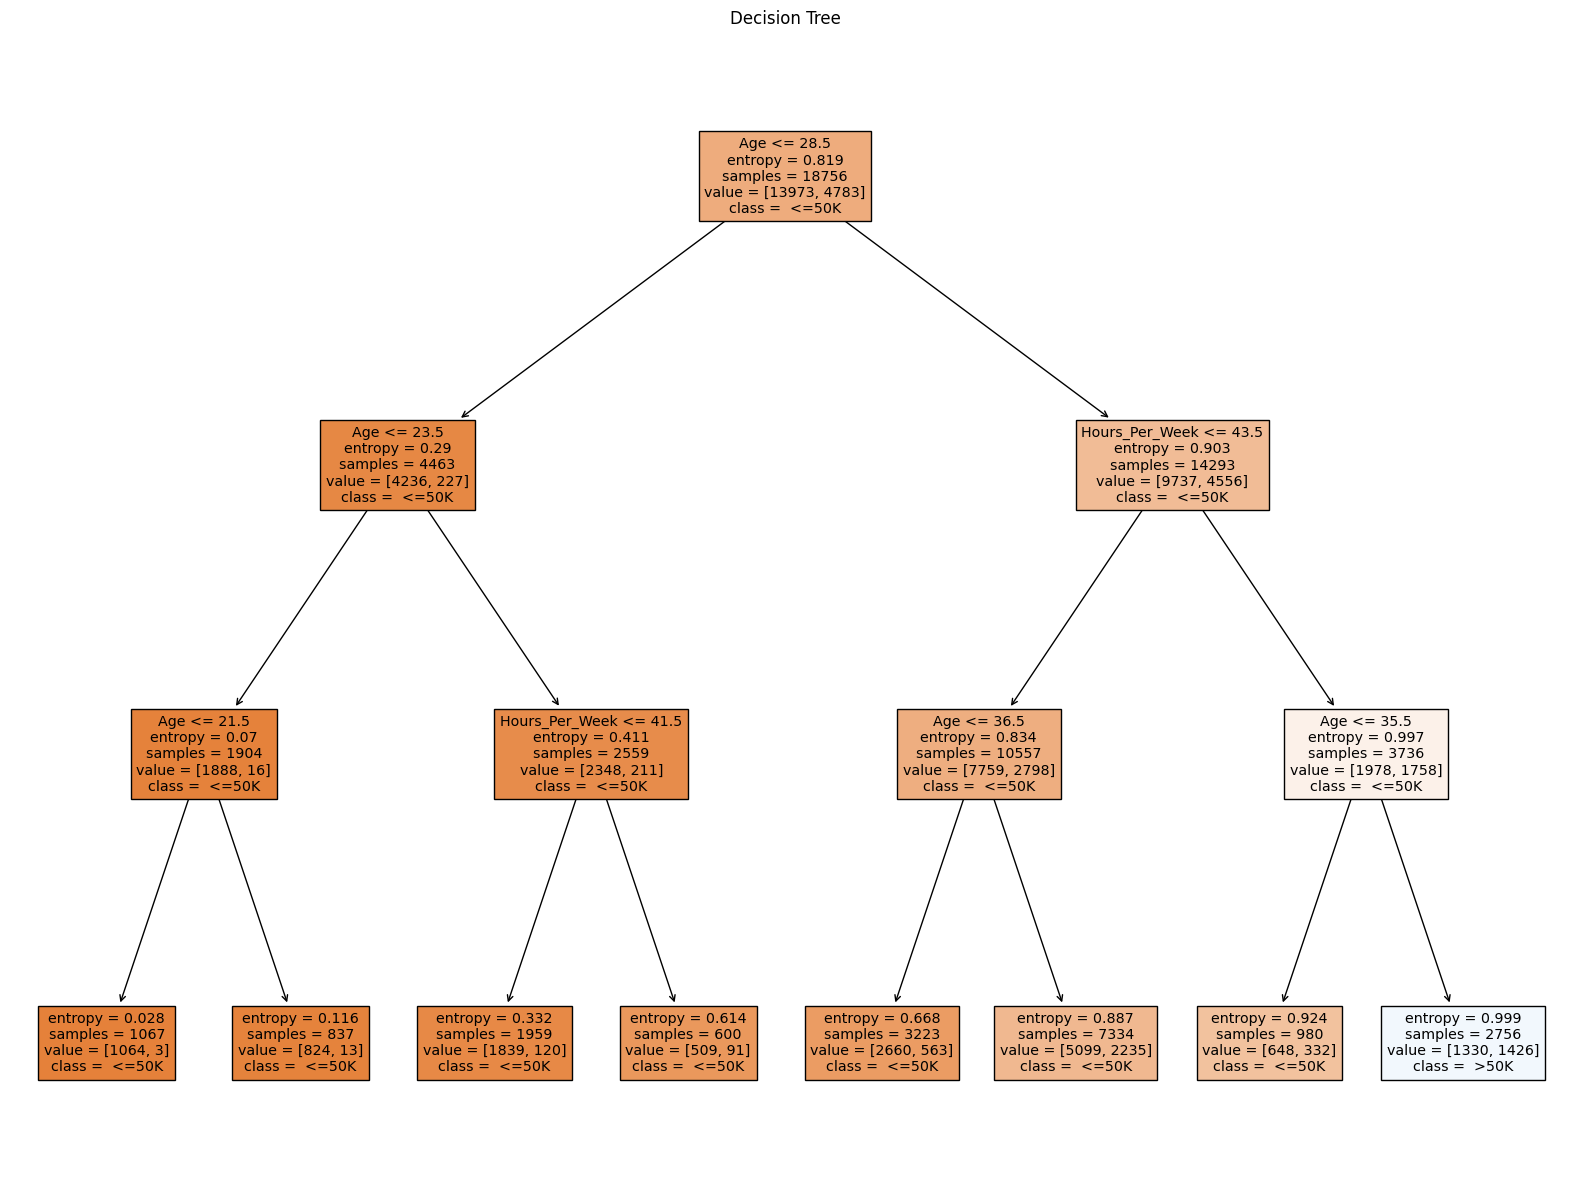

In [50]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names = list(X2.columns), class_names=list(model.classes_), )
plt.title("Decision Tree")
plt.show()



In [51]:
# Model Evaluation
Y_pred = model.predict(X2_test)       # makes prediction using a trained machine learning model on X_test dataset.
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7383237364043506


In [52]:
Y_pred_prob = model.predict_proba(X2_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.703330683251032


In [53]:
# Creating confusion matix based on the model prediction and actual value where Y_test is the actual value of target variable and Y_pred is the predicted value made by model
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[3133  364]
 [ 863  329]]


In [54]:
Cen_Income.columns

Index(['Age', 'Work_Class', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Income'],
      dtype='object')

In [55]:
#-----------------------------------------------------------------#Creaating model 3 by using logistic regression---------------------------------------------------------------------------------------------------------
CenIncome_mod3 = Cen_Income[['Age','Hours_Per_Week','Sex','Income']]

X3 = CenIncome_mod3.drop('Income',axis=1)
Y = CenIncome_mod3['Income']

In [56]:
num_var = X3[['Age','Hours_Per_Week']]
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_var)




In [57]:
CenIncome_mod3.head()

,Age,Hours_Per_Week,Sex,Income
0,39,40,Male,<=50K
2,38,40,Male,<=50K
3,53,40,Male,<=50K
4,28,40,Female,<=50K
5,37,40,Female,<=50K


In [58]:
print(X3.dtypes)

Age                int64
Hours_Per_Week     int64
Sex               object
dtype: object


In [59]:
print(CenIncome_mod3['Sex'].unique())

[' Male' ' Female']


In [60]:
cat_var = X3['Sex']


CenIncome_mod3['Sex_Encoded'] = CenIncome_mod3['Sex'].map({0: 'Male', 1: 'Female'})
CenIncome_mod3['Sex_Encoded']= CenIncome_mod3['Sex_Encoded'].astype('category')

<ipython-input-60-ce3c3fb07072>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CenIncome_mod3['Sex_Encoded'] = CenIncome_mod3['Sex'].map({0: 'Male', 1: 'Female'})
<ipython-input-60-ce3c3fb07072>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CenIncome_mod3['Sex_Encoded']= CenIncome_mod3['Sex_Encoded'].astype('category')


In [61]:
print(CenIncome_mod3.dtypes)

Age                  int64
Hours_Per_Week       int64
Sex                 object
Income              object
Sex_Encoded       category
dtype: object


In [62]:
print(CenIncome_mod3['Sex'].unique())

[' Male' ' Female']


In [63]:
print(CenIncome_mod3)

       Age  Hours_Per_Week      Sex  Income Sex_Encoded
0       39              40     Male   <=50K         NaN
2       38              40     Male   <=50K         NaN
3       53              40     Male   <=50K         NaN
4       28              40   Female   <=50K         NaN
5       37              40   Female   <=50K         NaN
...    ...             ...      ...     ...         ...
32555   22              40     Male   <=50K         NaN
32556   27              38   Female   <=50K         NaN
32557   40              40     Male    >50K         NaN
32558   58              40   Female   <=50K         NaN
32560   52              40   Female    >50K         NaN

[23445 rows x 5 columns]


In [70]:

X3_train, X3_test, Y_train, Y_test = train_test_split(num_scaled, Y, test_size=0.3, random_state=42)
CenIncome_mod3 = LogisticRegression()     #initializing the logistic regression

CenIncome_mod3.fit(X3_train, Y_train)       # fit the model to the training data

LogisticRegression()

In [72]:
#Prediction on the test data
Y_pred = CenIncome_mod3.predict(X3_test)

#Calculating accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7395507534830822


In [75]:
#Calculating area under receiver opreating characteristics curve
Y_pred_prob = CenIncome_mod3.predict_proba(X3_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC): {auroc}')

Area under receiver operating characteric curve (AUROC): 0.7058418886422493
